In [1]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [2]:
Il, Ir, I0 = symbols("I_l I_r I0", real=True)
Ml, Cl = symbols("M_l C_l", positive=True)
Mr, Cr = symbols("M_r C_r", positive=True)
R0, Rload, Rg, L0, С0 = symbols("R0 R_{load} R_g L0 С0", positive=True)
omega, omega0, omegal, omegar = symbols("\\omega \\omega_0 \\omega_l \\omega_r", positive=True)
Csum0, Csuml, Csumr = symbols("C_{\\Sigma0} C_{{\\Sigma}l} C_{{\\Sigma}r}", positive=True)
Q0, Ql, Qr, Ll, Lr, Rl, Rr = symbols("Q0 Q_l Q_r L_l L_r R_l R_r", positive=True)
chig, chiload, chiw = symbols("\\chi_g \\chi_{load} \\chi_w", positive=True)
Kel, Ker, Khl, Khr = symbols("K^E_l K^E_r K^H_l K^H_r", positive=True)
f, f0, fl, fr = symbols("f f0 f_l f_r", positive=True)
Xl, Xr, X0 = symbols("X_l X_r X0", real=True)
Pg, phi, L = symbols("P_g \\varphi L", positive=True)
U, Z0, Z0n, Up = symbols("U Z0 Z^N_0 U_p", positive=True)
mw, Lw, Csumw, fw, Qw = symbols("m_w L_w C_{{\\Sigma}w} f_w Q_w", positive=True)
gamma, Iw, Xw = symbols("\\gamma I_w X_w", real=True)
Ib, Rsh = symbols("I_b R_{sh}", positive=True)

![](../../images/stationary.png)

# Cell

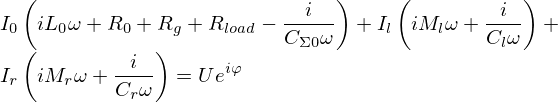

In [3]:
equation = Eq((I*omega*Ml - 1/(I*omega*Cl))*Il+(R0+Rload+Rg+I*omega*L0+1/(I*omega*Csum0))*I0+(I*omega*Mr - 1/(I*omega*Cr))*Ir, U*exp(I*phi))# + Up)
equation

$$U = \sqrt{8 P_g R_g}$$

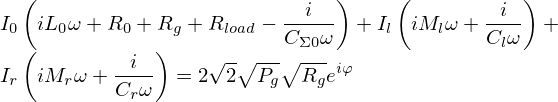

In [4]:
substitute = {U: 2*sqrt(2*Pg*Rg)}
equation = equation.subs(substitute)
equation

$$Q_0 = \frac{\omega_0 L}{R} = \frac{1}{\omega_0 C_{\Sigma} R_0}$$

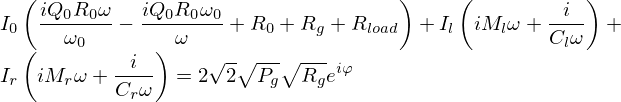

In [5]:
substitute = solve(Eq(Q0,omega0*L0/R0),L0,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Q0,1/(omega0*Csum0*R0)),Csum0,dict=1)[0]
equation = equation.subs(substitute)
equation

$$\chi_g = \frac{R_g}{R_0}$$
$$\chi_l = \frac{R_l}{R_0}$$

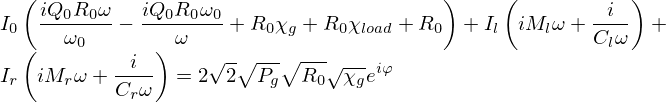

In [6]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(chiload,Rload/R0),Rload,dict=1)[0]
equation = equation.subs(substitute)
equation

$$K_H = 2\frac{M}{\sqrt{L_1 L_2}}$$

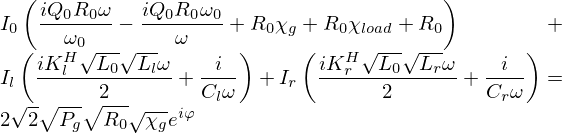

In [7]:
substitute = solve(Eq(Khl,2*Ml/sqrt(L0*Ll)),Ml,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Khr,2*Mr/sqrt(L0*Lr)),Mr,dict=1)[0]
equation = equation.subs(substitute)
equation

$$K_E = 2\frac{\sqrt{C_{\Sigma 1} C_{\Sigma 2}}}{C_2}$$

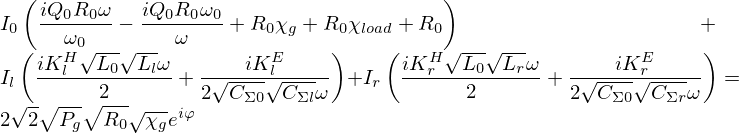

In [8]:
substitute = solve(Eq(Kel,2*sqrt(Csum0*Csuml)/Cl),Cl,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Ker,2*sqrt(Csum0*Csumr)/Cr),Cr,dict=1)[0]
equation = equation.subs(substitute)
equation

$$I = \frac{X}{\sqrt{L}}$$

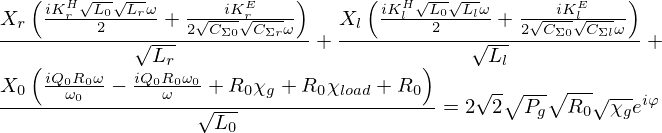

In [9]:
substitute = {Il: Xl/sqrt(Ll)}
equation = equation.subs(substitute)
substitute = {Ir: Xr/sqrt(Lr)}
equation = equation.subs(substitute)
substitute = {I0: X0/sqrt(L0)}
equation = equation.subs(substitute)
equation

$$\omega = 2 \pi f$$
$$\omega_0 = 2 \pi f_0$$

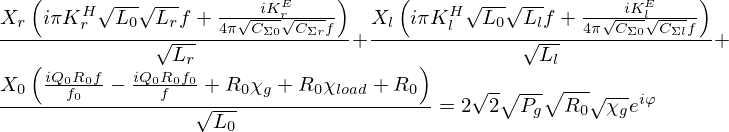

In [10]:
substitute = {omega: 2*pi*f}
equation = equation.subs(substitute)
substitute = {omegar: 2*pi*fr}
equation = equation.subs(substitute)
substitute = {omegal: 2*pi*fl}
equation = equation.subs(substitute)
substitute = {omega0: 2*pi*f0}
equation = equation.subs(substitute)
equation

$$f = \frac{1}{2 \pi \sqrt{C L}}$$

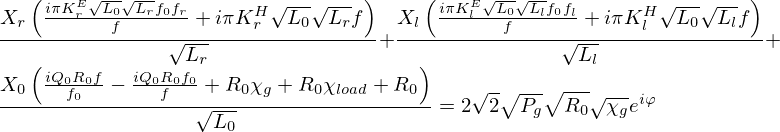

In [11]:
substitute = solve(Eq(1/(2*pi*sqrt(L0)*sqrt(Csum0)), f0), Csum0, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Ll)*sqrt(Csuml)), fl), Csuml, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Lr)*sqrt(Csumr)), fr), Csumr, dict=1)[0]
equation = equation.subs(substitute)
equation

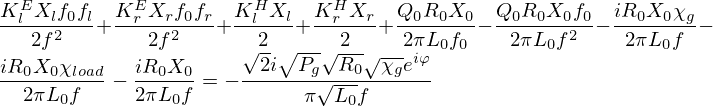

In [12]:
substitute = sqrt(L0)*2*pi*f*I
equation = expand(Eq(equation.lhs/substitute, equation.rhs/substitute))
equation

$$Q_0 = \frac{2 \pi f_0 L}{R}$$

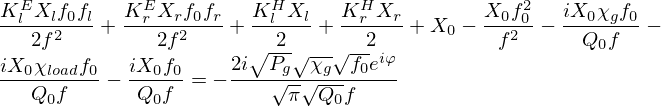

In [13]:
substitute = solve(Eq(Q0,2*pi*f0*L0/R0),R0,dict=1)[0]
equation = equation.subs(substitute)
equation

From file [current](../current/current.ipynb).

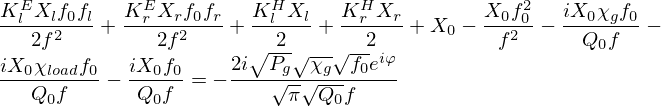

In [14]:
substitute = {Up: sqrt(L0)*Ib*sqrt(Q0)*sqrt(omega0**3)/sqrt(Rsh)}
equation = equation.subs(substitute)
equation

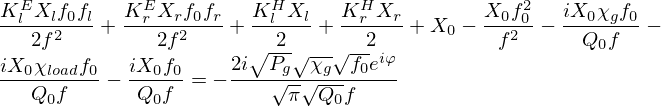

In [15]:
equation = expand(equation)
equation

Additional coupling may be added.

# Input inpedance

$$I = \frac{X}{\sqrt{L}}$$

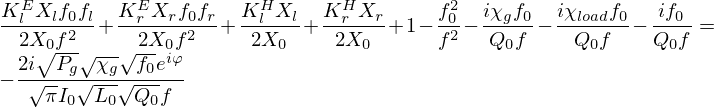

In [16]:
substitute = Eq(X0, I0*sqrt(L0))
equation = expand(Eq(equation.lhs/substitute.lhs, equation.rhs/substitute.rhs))
equation

$$Q_0 = \frac{2 \pi f_0 L}{R}$$

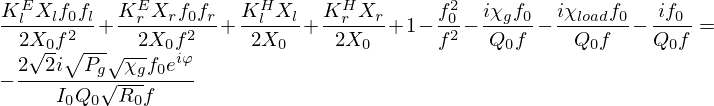

In [17]:
substitute = solve(Eq(Q0,2*pi*f0*L0/R0),L0,dict=1)[0]
equation = equation.subs(substitute)
equation

$$U = \sqrt{8 P_g R_g} \exp{(I \varphi)}$$

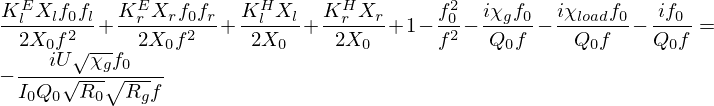

In [18]:
substitute = Eq(U,exp(I*phi)*sqrt(8*Rg*Pg))
equation = Eq(equation.lhs, equation.rhs*substitute.lhs/substitute.rhs)
equation

$$\chi_g = \frac{R_g}{R}$$

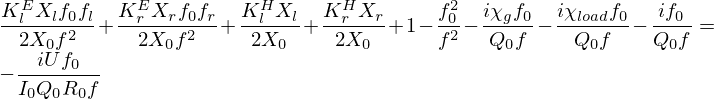

In [19]:
substitute = {chig: Rg/R0}
equation = Eq(equation.lhs, equation.rhs.subs(substitute))
equation

$$U = I (Z_0 + R_g)$$

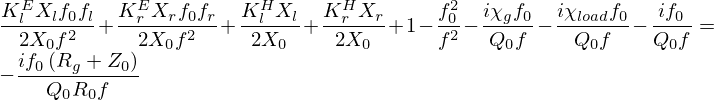

In [20]:
substitute = {U: I0*(Z0+Rg)}
equation = equation.subs(substitute)
equation = Eq(expand(equation.lhs), equation.rhs)
equation

$$\hat Z_0 = \frac{Z_0}{R_g}$$

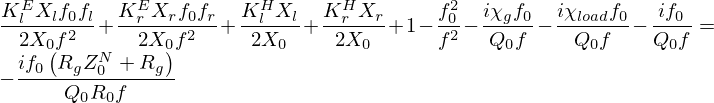

In [21]:
substitute = solve(Eq(Z0n,Z0/Rg),Z0,dict=1)[0]
equation = equation.subs(substitute)
equation

$$\chi_g = \frac{R_g}{R}$$

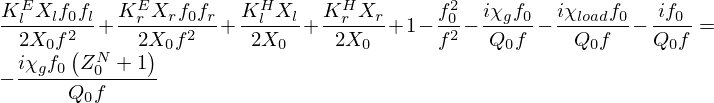

In [22]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
equation = Eq(equation.lhs, simplify(equation.rhs))
equation

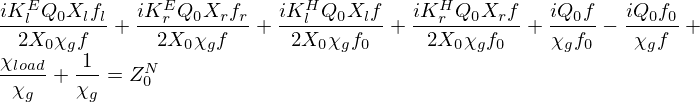

In [23]:
substutute = -I*chig*f0/Q0/f
equation = Eq(equation.lhs/substutute,equation.rhs/substutute)
substutute = 1
equation = Eq(equation.lhs-substutute,equation.rhs-substutute)
equation = expand(equation)
equation

Additional coupling may be added